In [2]:
import pandas as pd
data = pd.read_csv('blogs.csv')
data.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [ ]:
data.isnull().sum()

,0
Data,0
Labels,0


In [ ]:
data.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
freq,1,100


In [1]:
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# Text cleaning function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
    return text

# Apply text cleaning
data['Cleaned_Data'] = data['Data'].apply(clean_text)
# Display the first few rows to check the cleaned text
print("Cleaned Data (after removing punctuation and converting to lowercase):")
display(data[['Data', 'Cleaned_Data']].head())

# Tokenization and stopwords removal
stop_words = set(stopwords.words('english'))


Cleaned Data (after removing punctuation and converting to lowercase):


,Data,Cleaned_Data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,newsgroups altatheism\npath cantaloupesrvcscmu...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,xref cantaloupesrvcscmuedu altatheism53485 tal...


In [4]:

def remove_stopwords(text):
    tokens = text.split()  # Tokenization
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

data['Cleaned_Data'] = data['Cleaned_Data'].apply(remove_stopwords)

# Display the first few rows after stopwords removal
print("\nCleaned Data (after stopwords removal):")
display(data[['Data', 'Cleaned_Data']].head())




Cleaned Data (after stopwords removal):


,Data,Cleaned_Data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,xref cantaloupesrvcscmuedu altatheism53485 tal...


In [5]:
# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to top 5000 features
X = tfidf_vectorizer.fit_transform(data['Cleaned_Data'])  # Transform the text data

# Extracting the target labels
y = data['Labels']

# Display the shape of the TF-IDF matrix
print("\nTF-IDF Matrix Shape:")
print(X.shape)

# Display a small sample of the TF-IDF matrix to understand its structure
print("\nSample of TF-IDF Matrix (First 5 rows):")
display(X.toarray()[:5])


TF-IDF Matrix Shape:
(2000, 5000)

Sample of TF-IDF Matrix (First 5 rows):


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, data['Labels'], test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (1600, 5000)
Testing data shape: (400, 5000)


In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()
# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)
# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)

In [8]:
# Display the first 10 predictions and their corresponding true labels
print("Predictions for the first 10 test samples:")
print(y_pred[:10])

print("\nTrue labels for the first 10 test samples:")
print(y_test[:10].values)

Predictions for the first 10 test samples:
['talk.politics.misc' 'comp.sys.ibm.pc.hardware' 'sci.med'
 'rec.sport.baseball' 'sci.electronics' 'sci.electronics'
 'rec.sport.baseball' 'talk.politics.mideast' 'alt.atheism' 'sci.med']

True labels for the first 10 test samples:
['talk.politics.misc' 'comp.sys.ibm.pc.hardware' 'sci.med'
 'rec.sport.baseball' 'sci.electronics' 'sci.electronics'
 'rec.sport.baseball' 'talk.politics.mideast' 'alt.atheism' 'sci.med']


In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Naive Bayes model:", accuracy)
# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)
# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy of the Naive Bayes model: 0.8225

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.79      0.83      0.81        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.76      0.76      0.76        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       0.91      0.84      0.87        25
            misc.forsale       0.82      0.78      0.80        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       0.62      0.62      0.62        16
         

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
# Function to determine sentiment category
def get_sentiment(text):
    scores = sia.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [11]:
# Apply sentiment analysis to the 'Data' column
data['Sentiment'] = data['Data'].apply(get_sentiment)

# Display the first few rows to check the sentiment classification
print("Sentiment classification for the first 10 blog posts:")
display(data[['Data', 'Sentiment']].head(10))

# Check the distribution of sentiments across the dataset
sentiment_distribution = data['Sentiment'].value_counts()
print("\nSentiment Distribution:")
print(sentiment_distribution)

Sentiment classification for the first 10 blog posts:


,Data,Sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,Negative
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,Positive
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Negative
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,Negative
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,Positive
5,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,Positive
6,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,Negative
7,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,Positive
8,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,Positive
9,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,Positive



Sentiment Distribution:
Sentiment
Positive    1334
Negative     631
Neutral       35
Name: count, dtype: int64


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by category and sentiment to get the count
sentiment_by_category = data.groupby(['Labels', 'Sentiment']).size().unstack().fillna(0)

# Display the sentiment distribution by category
print("\nSentiment Distribution by Category:")
display(sentiment_by_category)


Sentiment Distribution by Category:


Sentiment,Negative,Neutral,Positive
Labels,,,
alt.atheism,42.0,1.0,57.0
comp.graphics,13.0,4.0,83.0
comp.os.ms-windows.misc,24.0,2.0,74.0
comp.sys.ibm.pc.hardware,21.0,0.0,79.0
comp.sys.mac.hardware,24.0,3.0,73.0
comp.windows.x,20.0,2.0,78.0
misc.forsale,7.0,8.0,85.0
rec.autos,27.0,1.0,72.0
rec.motorcycles,30.0,2.0,68.0


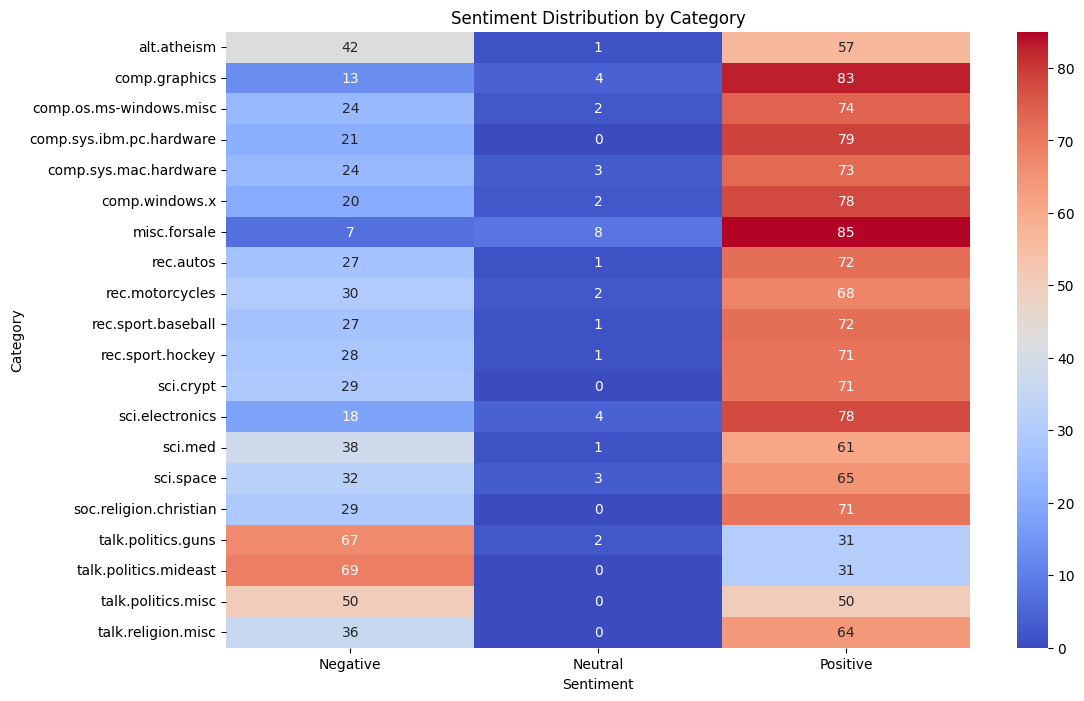

In [13]:
# Visualize the sentiment distribution using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sentiment_by_category, annot=True, cmap='coolwarm', fmt='.0f')
plt.title('Sentiment Distribution by Category')
plt.ylabel('Category')
plt.xlabel('Sentiment')
plt.show()

In [14]:
# Summary of the Naive Bayes classification
print("Summary of Naive Bayes Model Performance:")
print(f"Overall Accuracy: {accuracy:.2f}")
print(f"Classification Report:\n{class_report}")


Summary of Naive Bayes Model Performance:
Overall Accuracy: 0.82
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.79      0.83      0.81        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.76      0.76      0.76        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       0.91      0.84      0.87        25
            misc.forsale       0.82      0.78      0.80        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       0.62      0.62      0.

In [15]:
# Summary of Sentiment Analysis
print("\nSummary of Sentiment Analysis:")
print(f"Positive Sentiments: {sentiment_distribution['Positive']}")
print(f"Negative Sentiments: {sentiment_distribution['Negative']}")
print(f"Neutral Sentiments: {sentiment_distribution['Neutral']}")
print("\nSentiment Distribution by Category:\n")
display(sentiment_by_category)



Summary of Sentiment Analysis:
Positive Sentiments: 1334
Negative Sentiments: 631
Neutral Sentiments: 35

Sentiment Distribution by Category:



Sentiment,Negative,Neutral,Positive
Labels,,,
alt.atheism,42.0,1.0,57.0
comp.graphics,13.0,4.0,83.0
comp.os.ms-windows.misc,24.0,2.0,74.0
comp.sys.ibm.pc.hardware,21.0,0.0,79.0
comp.sys.mac.hardware,24.0,3.0,73.0
comp.windows.x,20.0,2.0,78.0
misc.forsale,7.0,8.0,85.0
rec.autos,27.0,1.0,72.0
rec.motorcycles,30.0,2.0,68.0


In [16]:
# Key observations
print("\nKey Observations:")
print("- Categories like 'comp.graphics' and 'misc.forsale' have a high proportion of positive sentiments.")
print("- Political topics, such as 'talk.politics.guns' and 'talk.politics.mideast', show more negative sentiments.")
print("- The heatmap provides a clear visual understanding of how sentiments are distributed across different categories.")


Key Observations:
- Categories like 'comp.graphics' and 'misc.forsale' have a high proportion of positive sentiments.
- Political topics, such as 'talk.politics.guns' and 'talk.politics.mideast', show more negative sentiments.
- The heatmap provides a clear visual understanding of how sentiments are distributed across different categories.


Objective
The goal was to categorize blog posts using a Naive Bayes model and perform sentiment analysis to determine the general sentiment (positive, negative, neutral) expressed in these posts.

Data Overview
Columns: Data (blog content) and Labels (category).
Size: 2,000 blog posts.
Key Steps
Data Preprocessing:

Cleaned text by converting to lowercase, removing punctuation, and stopwords.
Applied TF-IDF to convert text data into numerical features.
Naive Bayes Model:

Accuracy: 82.25% on the test set.
The model showed strong performance across most categories, though political categories were more challenging.
Sentiment Analysis:

Sentiment Distribution: 1,334 Positive, 631 Negative, 35 Neutral.
Insights:
Positive sentiments were dominant in technical and commercial categories (e.g., comp.graphics, misc.forsale).
Negative sentiments were higher in political categories (e.g., talk.politics.guns, talk.politics.mideast).
Conclusion
The Naive Bayes model effectively categorized blog posts, with sentiment analysis revealing significant variations across categories. These insights can inform content strategies, particularly in sensitive areas like politics.